In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
%matplotlib inline

In [2]:
food_inspections = pd.read_csv('Food_Inspections.csv')

In [3]:
food_inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163282 entries, 0 to 163281
Data columns (total 17 columns):
Inspection ID      163282 non-null int64
DBA Name           163282 non-null object
AKA Name           160823 non-null object
License #          163267 non-null float64
Facility Type      158630 non-null object
Risk               163216 non-null object
Address            163282 non-null object
City               163138 non-null object
State              163262 non-null object
Zip                163211 non-null float64
Inspection Date    163282 non-null object
Inspection Type    163281 non-null object
Results            163282 non-null object
Violations         130333 non-null object
Latitude           162711 non-null float64
Longitude          162711 non-null float64
Location           162711 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 21.2+ MB


In [4]:
food_inspections.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2130057,JENI'S SPLENDID ICE CREAMS,JENI'S SPLENDID ICE CREAMS,2574903.0,NaN,Risk 2 (Medium),3657 N CLARK ST,CHICAGO,IL,60613.0,01/05/2018,License,Not Ready,NaN,41.948716,-87.657563,"(41.94871604741052, -87.65756297881093)"
1,2130049,"JOE & THE JUICE ILLINOIS, LLC",JOE & THE JUICE,2564512.0,Restaurant,Risk 2 (Medium),10 E DELAWARE PL,CHICAGO,IL,60611.0,01/05/2018,License,Pass,NaN,41.899255,-87.627835,"(41.89925505559848, -87.62783463799146)"
2,2130044,EL MARIACHI RESTAURANT,EL MARIACHI BAR & GRILL,1574751.0,Restaurant,Risk 1 (High),3906-3908 N BROADWAY,CHICAGO,IL,60613.0,01/05/2018,Complaint,Fail,"6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRA...",41.953007,-87.649810,"(41.95300691072745, -87.64981007663842)"
3,2130038,SUBWAY,SUBWAY,2134794.0,Restaurant,Risk 1 (High),6072-6074 N NORTHWEST HWY,CHICAGO,IL,60631.0,01/05/2018,Canvass,Pass,36. LIGHTING: REQUIRED MINIMUM FOOT-CANDLES OF...,41.991652,-87.798097,"(41.99165185328709, -87.79809695431013)"
4,2130022,BOO BAE TEA INC,BOO BAE TEA INC,2570290.0,NaN,Risk 2 (Medium),1013 W Webster AVE,CHICAGO,IL,60614.0,01/05/2018,License,Not Ready,NaN,41.921620,-87.654051,"(41.92161984057171, -87.65405058579164)"


In [5]:
results = food_inspections.loc[food_inspections['Results'] == 'Fail']
results[:5]

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
2,2130044,EL MARIACHI RESTAURANT,EL MARIACHI BAR & GRILL,1574751.0,Restaurant,Risk 1 (High),3906-3908 N BROADWAY,CHICAGO,IL,60613.0,01/05/2018,Complaint,Fail,"6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRA...",41.953007,-87.649810,"(41.95300691072745, -87.64981007663842)"
6,2130018,FRESHII,FRESHII,2446395.0,Restaurant,Risk 1 (High),1166 W MADISON ST,CHICAGO,IL,60607.0,01/05/2018,Canvass,Fail,"9. WATER SOURCE: SAFE, HOT & COLD UNDER CITY P...",41.881731,-87.656851,"(41.881731324473414, -87.65685079354886)"
8,2129975,Panino's Pizzeria,Panino's Pizzeria,1517789.0,Restaurant,Risk 1 (High),3702-3704 N BROADWAY,CHICAGO,IL,60613.0,01/04/2018,Complaint,Fail,24. DISH WASHING FACILITIES: PROPERLY DESIGNED...,41.949215,-87.648562,"(41.949214874632226, -87.64856239438521)"
13,2129953,JERK TACO MAN 1,JERK TACO MAN,2529063.0,Restaurant,Risk 1 (High),4001 W JACKSON BLVD,CHICAGO,IL,60624.0,01/04/2018,Complaint,Fail,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.876976,-87.725666,"(41.87697594883604, -87.72566593724505)"
14,2129940,M. HENRY,M. HENRY,1960180.0,Restaurant,Risk 1 (High),5705-5707 N CLARK ST,CHICAGO,IL,60660.0,01/04/2018,Complaint,Fail,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.985597,-87.669073,"(41.98559673197454, -87.66907264871382)"


In [6]:
violations = results.Violations.dropna()
violations.head()

2     6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRA...
6     9. WATER SOURCE: SAFE, HOT & COLD UNDER CITY P...
8     24. DISH WASHING FACILITIES: PROPERLY DESIGNED...
13    3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...
14    3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...
Name: Violations, dtype: object

In [7]:
violations[2]

'6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRACTICES; NO BARE HAND CONTACT WITH READY-TO-EAT FOODS. - Comments: POOR HYGIENIC PRACTICES,OBSERVED EMPLOYEE GRABBING  WITH BARE HANDS AND BANDAGE ON HIS HAND,SLICED ONION TO STORE THEM INSIDE PLASTIC BAG AND WEIGH THEM, NO FOOD GLOVE USED. INSTRUCTED TO WASH HANDS AND USE FOOD GLOVES.\nCRITICAL VIOLATION:7-38-010(A). | 8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS:  CLEAN, PROPER TEMPERATURE, CONCENTRATION, EXPOSURE TIME - Comments: LOW TEMP DISH MACHINE UNABLE TO DISPENSE SANITIZER AT FINAL RINSE,PRESENTLY 0ppm.UNIT IN USE,OBSERVED POTS INSIDE THE UNIT.INSTRUCTED TO USE THREE COMPARTMENT SINK. DISH MACHINE SERVICE ARRIVED DURING INSPECTION TO REPAIR. MACHINE DISPENSING 100 PPM AVAILABLE CHLORINE AFTER SERVICE.\nCRITICAL VIOLATION:7-38-030. | 11. ADEQUATE NUMBER, CONVENIENT, ACCESSIBLE, DESIGNED, AND MAINTAINED - Comments: NO PAPER TOWELS PROVIDED AT EXPOSED HAND SINK IN BASEMENT PREP AREA BY THE LARGE ICE MACHINE ,PREP TABLE AND OPENED F

In [8]:
comments = []
def nlpGetReason(x):
    for kvs in x.split(' | '):
        comment = re.split(' - Comments: ', kvs)[1]
        comment = re.sub(r'\n\w+ VIOLATION.*$', '', comment.strip())
        comments.append(comment.strip())
    return None

In [12]:
raw = ' '.join(comments)

In [13]:
violations.apply(nlpGetReason)
words = nltk.tokenize.word_tokenize(raw)
fdist = nltk.FreqDist(words)

In [14]:
fdist.most_common(10)

[('.', 377790),
 (',', 254459),
 ('AND', 199196),
 ('THE', 151526),
 ('IN', 142867),
 ('TO', 110898),
 ('and', 92800),
 ('MUST', 85072),
 ('OF', 85066),
 ('AT', 71147)]

In [15]:
stopwords = set(nltk.corpus.stopwords.words('english'))

words = [word for word in words if len(word) > 1]
words = [word for word in words if not word.isnumeric()]
words = [word for word in words if word.isalpha()]
words = [word.lower() for word in words]
words = [word for word in words if word not in stopwords]

In [16]:
fdist = nltk.FreqDist(words)
fdist.most_common(10)

[('must', 92954),
 ('clean', 76383),
 ('food', 74528),
 ('area', 61616),
 ('instructed', 55470),
 ('sink', 48815),
 ('prep', 48656),
 ('floor', 40889),
 ('repair', 39532),
 ('shall', 39503)]

In [17]:
wnl = nltk.WordNetLemmatizer()
cleaned_words = [wnl.lemmatize(t) for t in words]

In [18]:
bgs = [b for b in nltk.bigrams(cleaned_words)]
tgs = [b for b in nltk.trigrams(cleaned_words)]

In [19]:
fdist_bgs = nltk.FreqDist(bgs)
fdist_bgs.most_common(10)

[(('prep', 'area'), 27598),
 (('compartment', 'sink'), 14933),
 (('citation', 'issued'), 13929),
 (('serious', 'violation'), 13864),
 (('must', 'clean'), 13099),
 (('clean', 'maintain'), 12792),
 (('pest', 'control'), 12770),
 (('must', 'provide'), 12248),
 (('detail', 'clean'), 12200),
 (('storage', 'area'), 11325)]

In [20]:
fdist_tgs = nltk.FreqDist(tgs)
fdist_tgs.most_common(10)

[(('potentially', 'hazardous', 'food'), 9336),
 (('shall', 'good', 'repair'), 6047),
 (('exposed', 'hand', 'sink'), 5864),
 (('smooth', 'easily', 'cleanable'), 5334),
 (('three', 'compartment', 'sink'), 4702),
 (('previous', 'minor', 'violation'), 4653),
 (('serious', 'citation', 'issued'), 4265),
 (('food', 'prep', 'area'), 4203),
 (('kept', 'clean', 'good'), 4181),
 (('constructed', 'per', 'code'), 4122)]

In [32]:
violations = results.Violations.dropna()
violations[300]

'29. PREVIOUS MINOR VIOLATION(S) CORRECTED 7-42-090 - Comments: PREVIOUS MINOR VIOLATIONS NOT CORRECTED FROM 08/04/17 REPORT#2071980. (32) OBSERVED RUSTY FOOD STORAGE SHELVING INSIDE WALK-IN COOLER. MUST REPAINT OR REPLACE SERIOUS VIOLATION. 7-42-090. | 12. HAND WASHING FACILITIES: WITH SOAP AND SANITARY HAND DRYING DEVICES, CONVENIENT AND ACCESSIBLE TO FOOD PREP AREA - Comments: OBSERVED EXPOSED HAND WASHING SINK NOT ACCESSIBLE IN FRONT PREP AREA. FOUND IN FRONT OF EXPOSED SINK A PREP TABLE AND EMPLOYEES CUTTING VEGETABLES AND PREPING FOOD. MANAGEMENT REQUIRED TO REMOVE PREP TABLE. MANAGER REMOVE PREP TABLE EXPOSED HAND SINK NOW IS AVAILABLE. CRITICAL VIOLATION 7-38-030 | 16. FOOD PROTECTED DURING STORAGE, PREPARATION, DISPLAY, SERVICE AND TRANSPORTATION - Comments: OBSERVED FOOD AND PREP AREAS NOT PROPERLY PROTECTED. OBSERVED ENTRY WAY TO THE FRONT PREP AREA FROM CUSTOMERS AREA WITH AN APPROXIMATE 8 FOOT WIDE OPENING. INSTRUCTED TO INSTALL A PERMANENT BARRIER OR GATE AND MAINTAIN. \n

In [33]:
vioNumbers = []
def nlpGetNum(x):
    for element in x.split(' | '):
        string = re.split(' - Comments: ', element)[0]
        string = re.findall(r'^\d+', element)
        vioNumbers.append(string)
    return None

In [34]:
violations.apply(nlpGetNum)
vioNumbers[:100]

[['6'],
 ['8'],
 ['11'],
 ['16'],
 ['38'],
 ['32'],
 ['33'],
 ['34'],
 ['36'],
 ['9'],
 ['29'],
 ['32'],
 ['34'],
 ['24'],
 ['34'],
 ['32'],
 ['33'],
 ['3'],
 ['9'],
 ['18'],
 ['19'],
 ['33'],
 ['34'],
 ['35'],
 ['41'],
 ['32'],
 ['40'],
 ['43'],
 ['38'],
 ['3'],
 ['29'],
 ['30'],
 ['33'],
 ['41'],
 ['34'],
 ['42'],
 ['12'],
 ['38'],
 ['35'],
 ['13'],
 ['34'],
 ['21'],
 ['41'],
 ['18'],
 ['32'],
 ['38'],
 ['41'],
 ['43'],
 ['40'],
 ['30'],
 ['33'],
 ['38'],
 ['29'],
 ['3'],
 ['18'],
 ['35'],
 ['38'],
 ['43'],
 ['33'],
 ['30'],
 ['16'],
 ['21'],
 ['36'],
 ['34'],
 ['32'],
 ['35'],
 ['33'],
 ['29'],
 ['2'],
 ['3'],
 ['11'],
 ['31'],
 ['30'],
 ['35'],
 ['41'],
 ['13'],
 ['38'],
 ['41'],
 ['34'],
 ['32'],
 ['33'],
 ['35'],
 ['18'],
 ['35'],
 ['38'],
 ['41'],
 ['36'],
 ['34'],
 ['33'],
 ['21'],
 ['18'],
 ['29'],
 ['33'],
 ['35'],
 ['36'],
 ['43'],
 ['3'],
 ['18'],
 ['34'],
 ['35']]

In [35]:
lst = []
def func(x):
    for num in x:
        lst.append(int(num[0]))

func(vioNumbers)

In [36]:
c = Counter(lst)
c

Counter({1: 348,
         2: 3545,
         3: 3420,
         4: 247,
         5: 10,
         6: 756,
         7: 85,
         8: 1299,
         9: 1405,
         10: 745,
         11: 2787,
         12: 1859,
         13: 571,
         14: 806,
         16: 3489,
         17: 55,
         18: 16142,
         19: 3818,
         20: 110,
         21: 4001,
         22: 931,
         23: 3,
         24: 2965,
         25: 124,
         26: 1315,
         27: 281,
         28: 590,
         29: 5334,
         30: 4009,
         31: 2642,
         32: 14626,
         33: 15979,
         34: 18805,
         35: 17614,
         36: 7614,
         37: 2639,
         38: 15166,
         39: 229,
         40: 4630,
         41: 10437,
         42: 1647,
         43: 2161,
         44: 131,
         45: 1794,
         70: 421})

In [37]:
abc = c.most_common(10)
abc

[(34, 18805),
 (35, 17614),
 (18, 16142),
 (33, 15979),
 (38, 15166),
 (32, 14626),
 (41, 10437),
 (36, 7614),
 (29, 5334),
 (40, 4630)]

In [38]:
x_val = [x[0] for x in abc]
y_val = [y[1] for y in abc]

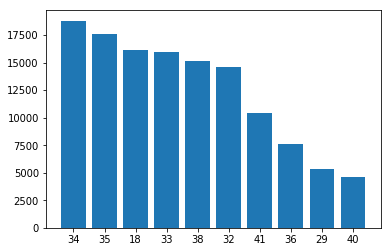

In [39]:
plt.bar(range(10), y_val)
plt.xticks(range(10), x_val)
plt.show()